In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

import pickle

from itertools import product
from itertools import combinations_with_replacement as cwr

from src.ipm import grablabels

In [2]:
y = grablabels(hierarchy='categories')
y = y[np.argwhere(~np.isnan(y)).squeeze()]

yc = np.full(y.size, 'xx')
yc[y==0] = 'af'
yc[y==1] = 'hf'
yc[y==2] = 'mf'
yc[y==3] = 'hb'
yc[y==4] = 'mb'
yc[y==5] = 'ab'
yc[y==6] = 'xn'
yc[y==7] = 'xa'

argsort = np.argsort(y)
y = y[argsort]

In [3]:
out_path = r"G:\Codes\Python\out\rsa"

In [4]:
gtruth = {}



mat = np.nan * np.ones([(~np.isnan(y)).sum(), (~np.isnan(y)).sum()])
for c1, c2 in product([0, 1, 2], [3, 4, 5]):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 1
            mat[cj, ci] = 1
for c1, c2 in cwr([0, 1, 2], 2):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 0
            mat[cj, ci] = 0            
for c1, c2 in cwr([3, 4, 5], 2):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 0
            mat[cj, ci] = 0   
gtruth['f-b'] = mat

mat = np.nan * np.ones([(~np.isnan(y)).sum(), (~np.isnan(y)).sum()])
for c1, c2 in product([1, 2], [3, 4]):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 1
            mat[cj, ci] = 1
for c1, c2 in cwr([1, 2], 2):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 0
            mat[cj, ci] = 0            
for c1, c2 in cwr([3, 4], 2):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 0
            mat[cj, ci] = 0        
gtruth['pf-pb'] = mat

mat = np.nan * np.ones([(~np.isnan(y)).sum(), (~np.isnan(y)).sum()])
for c1, c2 in product([0, 1, 2, 3, 4, 5], [6, 7]):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 1
            mat[cj, ci] = 1
for c1, c2 in cwr([0, 1, 2, 3, 4, 5], 2):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 0
            mat[cj, ci] = 0            
for c1, c2 in cwr([6, 7], 2):
    for ci in np.argwhere(y==c1):
        for cj in np.argwhere(y==c2):
            mat[ci, cj] = 0
            mat[cj, ci] = 0 
gtruth['a-i'] = mat

with open(os.path.join(out_path, "gtruth.pkl"), 'wb') as handle:
    pickle.dump(gtruth, handle, protocol=pickle.HIGHEST_PROTOCOL)

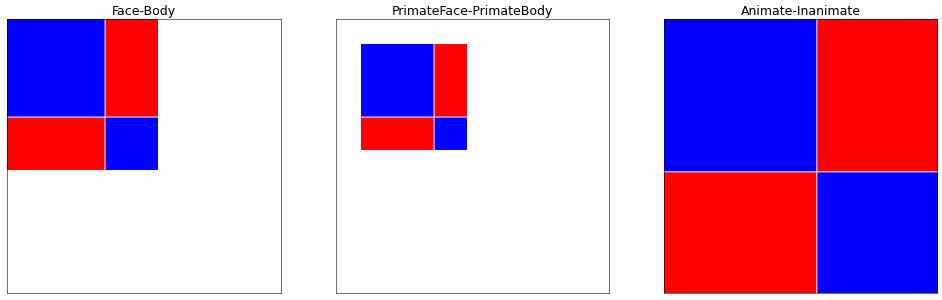

In [5]:
titles = ["Face-Body", "PrimateFace-PrimateBody", "Animate-Inanimate"]
fig, axs = plt.subplots(1, 3, figsize=(24,8), dpi=50)

for it, key in enumerate(gtruth):
    axs[it].imshow(gtruth[key], cmap='bwr')
    axs[it].set_title(titles[it], fontsize=18)
    axs[it].axis('image')
    axs[it].set_xticks([])
    axs[it].set_yticks([])

In [6]:
gtruth['f-b'].shape

(95, 95)